<a href="https://colab.research.google.com/github/Swayyum/Intro-to-ML--4105/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/Intro to ML Collab/Datasets/D3.csv'
sample = pd.DataFrame(pd.read_csv(file_path))
sample.head()
df = pd.read_csv(file_path)
print (df.head())

         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


In [47]:
# Separate features and labels
X1 = df.values[:, 0]  # get input values from the first column for X1
X2 = df.values[:, 1]  # get input values from the second column for X2
X3 = df.values[:, 2]  # get input values from the third column for X3
y = df.values[:, 3]   # get output values from the fourth column for y
m = len(y)  # Number of training examples
#n = len(X)  # Number of training examples

# Display first 5 records of each feature and the total number of training examples
print('X1 = ', X1[:5])
print('X2 = ', X2[:5])
print('X3 = ', X3[:5])
print('y = ', y[:5])
print('m = ', m)
#print('n = ', n)

X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100


In [48]:
from IPython.display import display
display(df)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


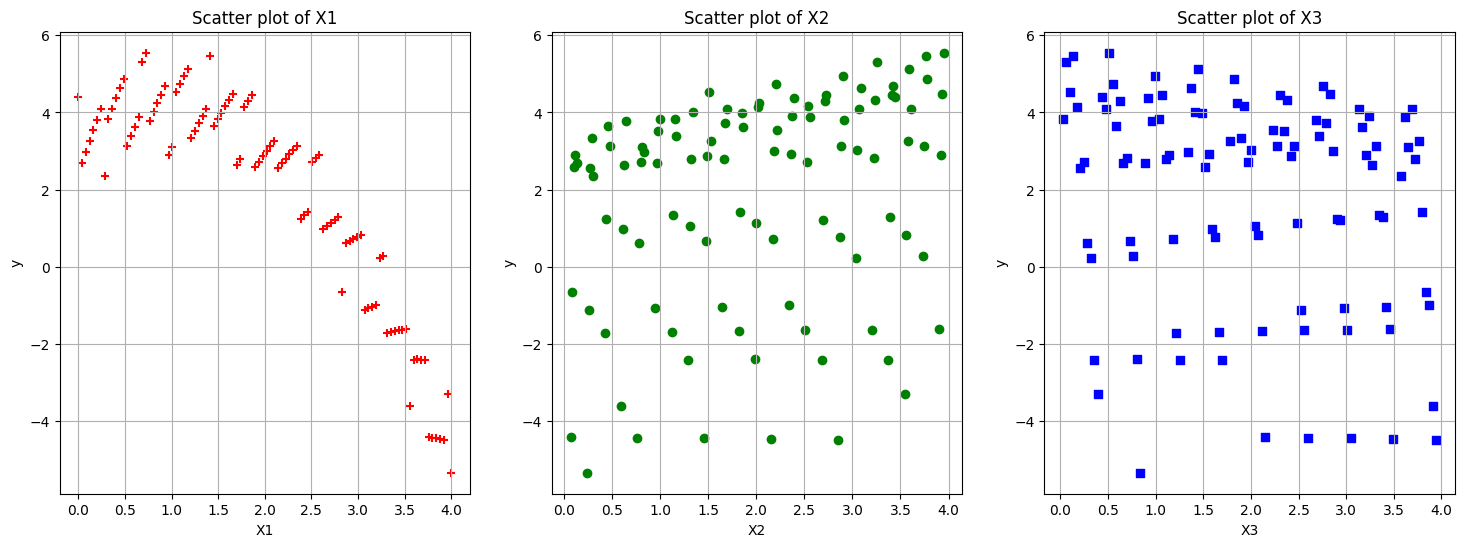

In [9]:
# Separate features (X1, X2, X3) and labels (y)
X1 = df.values[:, 0]  # get input values from the first column for X1
X2 = df.values[:, 1]  # get input values from the second column for X2
X3 = df.values[:, 2]  # get input values from the third column for X3
y = df.values[:, 3]   # get output values from the fourth column for y

# Create separate scatter plots for X1, X2, and X3
plt.figure(figsize=(18, 6))

# Scatter plot for X1
plt.subplot(131)
plt.scatter(X1, y, color='red', marker='+')
plt.grid(True)
plt.xlabel('X1')
plt.ylabel('y')
plt.title('Scatter plot of X1')

# Scatter plot for X2
plt.subplot(132)
plt.scatter(X2, y, color='green', marker='o')
plt.grid(True)
plt.xlabel('X2')
plt.ylabel('y')
plt.title('Scatter plot of X2')

# Scatter plot for X3
plt.subplot(133)
plt.scatter(X3, y, color='blue', marker='s')
plt.grid(True)
plt.xlabel('X3')
plt.ylabel('y')
plt.title('Scatter plot of X3')

# Show the plots
plt.show()

In [10]:
X_0 = np.ones((m, 1))
X_0[:5]


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [11]:
X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)
X_1[:10]
X_2[:10]
X_3[:10]

array([[0.44      ],
       [0.88848485],
       [1.3369697 ],
       [1.78545454],
       [2.23393939],
       [2.68242424],
       [3.13090909],
       [3.57939394],
       [0.02787879],
       [0.47636364]])

# **PART B using All three explanatory variables **

In [99]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X = np.hstack((X_1, X_2, X_3))
X[:5]

array([[0.        , 3.44      , 0.44      ],
       [0.04040404, 0.1349495 , 0.88848485],
       [0.08080808, 0.82989899, 1.3369697 ],
       [0.12121212, 1.52484848, 1.78545454],
       [0.16161616, 2.21979798, 2.23393939]])

In [102]:
theta1 = np.zeros(3)  # Assuming X1 has a column of ones
theta2 = np.zeros(3)  # Assuming X2 has a column of ones
theta3 = np.zeros(3)  # Assuming X3 has a column of ones

In [103]:
def compute_cost1(X, y, theta1):
    m= len(y)  # Number of training examples
    # Compute the cost for theta1
    predictions1 = X.dot(theta1)  # Reshape theta1 to (n, 1)
    errors1 = np.subtract(predictions1, y)
    sqrErrors1 = np.square(errors1)
    J1 = 1 / (2 * m) * np.sum(sqrErrors1)
    return J1
def compute_cost2(X, y, theta2):
    m= len(y)  # Number of training examples
    predictions2 = X.dot(theta2)  # Reshape theta1 to (n, 1)
    errors2 = np.subtract(predictions2, y)
    sqrErrors2 = np.square(errors2)
    J2 = 1 / (2 * m) * np.sum(sqrErrors2)
    return J2

def compute_cost3(X, y, theta3):
    m= len(y)  # Number of training examples
    predictions3 = X.dot(theta3)  # Reshape theta1 to (n, 1)
    errors3 = np.subtract(predictions3, y)
    sqrErrors3 = np.square(errors3)
    J3 = 1 / (2 * m) * np.sum(sqrErrors3)

    return J3
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost

    """
# Example usage:
cost1 = compute_cost1(X, y, theta1)
cost2 = compute_cost2(X, y, theta2)
cost3 = compute_cost3(X, y, theta3)
print('The cost for theta =', cost1, cost2, cost3)


The cost for theta = 5.524438459196242 5.524438459196242 5.524438459196242


In [123]:
def gradient_descent(X, y, theta1, theta2, theta3, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history1 = np.zeros(iterations)
    cost_history2 = np.zeros(iterations)
    cost_history3 = np.zeros(iterations)

    for i in range(iterations):
        predictions1 = X1.dot(theta1)
        errors1 = np.subtract(predictions1, y)
        sum_delta1 = (alpha / m) * X.transpose().dot(errors1)
        theta1 -= sum_delta1
        cost_history1[i] = compute_cost1(X, y, theta1)

    for i in range(iterations):
        predictions2 = X.dot(theta2)
        errors2 = np.subtract(predictions2, y)
        sum_delta2 = (alpha / m) * X.transpose().dot(errors2)
        theta2 -= sum_delta2
        cost_history2[i] = compute_cost2(X, y, theta2)

    for i in range(iterations):
        predictions3 = X.dot(theta3)
        errors3 = np.subtract(predictions3, y)
        sum_delta3 = (alpha / m) * X.transpose().dot(errors3)
        theta3 -= sum_delta3
        cost_history3[i] = compute_cost3(X, y, theta3)

    return theta1, theta2, theta3, cost_history1, cost_history2, cost_history3

Alpha= 0.1

In [124]:
theta1 = [0., 0., 0.]  # X1's theta, assuming X1 has a column of ones
iterations = 1500
alpha = 0.1

In [126]:
# Perform gradient descent for X1
theta1, cost_history1 = gradient_descent(X, y, theta1, theta2, theta3, alpha, iterations)
print('Final value of theta =', theta1)
print('cost_history =', cost_history1)

ValueError: ignored

Alpha = 0.01

In [74]:
theta = ([0., 0., 0., 0.])
iterations = 1500
alpha = 0.01

In [75]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 4.15118728 -1.8394291   0.72473856 -0.09513266]
cost_history = [5.21542243 4.97171977 4.7765543  ... 0.81079843 0.81065429 0.81051044]


ValueError: ignored

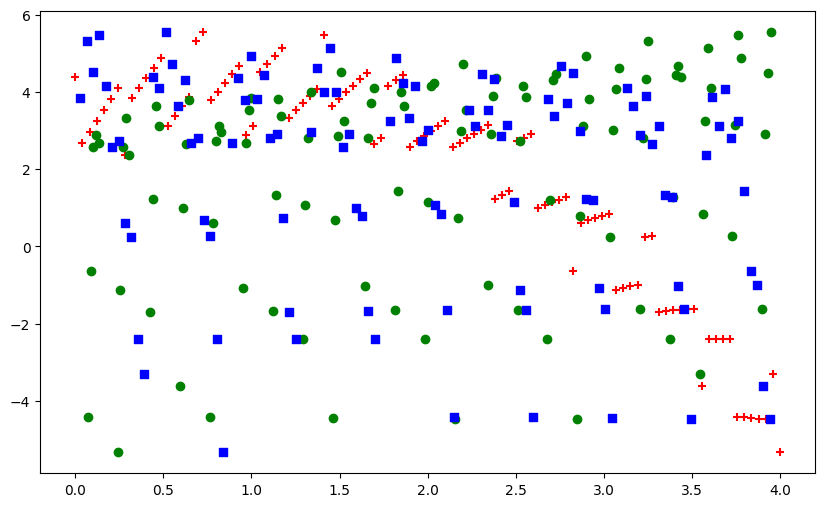

In [106]:

# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
plt.scatter(X[:, 1], y, color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(X[:, 1], X.dot(theta), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()
